# BellaBeat Case Study

**Bellabeat, a high-tech manufacturer of health-focused products for women is a successful small company, and wants to focus on new opportunities and grow their market further by analyzing smart devices' fitness data. Throughout this case study, I will focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices. The insights will then help guide marketing strategy for the company's growth.**

# **Step 1: Prepare**

The dataset used in this case study is public data that explores smart device users’ daily habits. This Kaggle data set contains personal fitness tracker from thirty fitbit users. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

Dataset:- https://www.kaggle.com/datasets/arashnic/fitbit
Total files:- 18 .csv files

Steps to be followed in the prepare phase:
1. Download/add the required dataset
2. Install the required libraries
3. Read the dataset
4. Understand the datatypes and the data within the dataframes

In [2]:
#Install the required libraries

import numpy as np         #installs numpy package
import pandas as pd        #installs pandas package
from pandas.api.types import CategoricalDtype
import seaborn as sns      #import for visualization
import matplotlib.pyplot as plt  #import for visualization

In [3]:
#Add the dataset

daily_activity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
weight_log = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")
sleep_day = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
hourly_calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
heartrate_seconds = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep_minutes = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
steps_hourly = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")


**Now lets look at all the datasets that have been added. We will evaluate which all are useful and how can we transform the data to better understand it**

In [4]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [5]:
weight_log

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000
...,...,...,...,...,...,...,...,...
62,8877689391,5/6/2016 6:43:35 AM,85.000000,187.392923,NaN,25.440001,False,1462517015000
63,8877689391,5/8/2016 7:35:53 AM,85.400002,188.274775,NaN,25.559999,False,1462692953000
64,8877689391,5/9/2016 6:39:44 AM,85.500000,188.495234,NaN,25.610001,False,1462775984000
65,8877689391,5/11/2016 6:51:47 AM,85.400002,188.274775,NaN,25.559999,False,1462949507000


In [6]:
sleep_day

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
...,...,...,...,...,...
408,8792009665,4/30/2016 12:00:00 AM,1,343,360
409,8792009665,5/1/2016 12:00:00 AM,1,503,527
410,8792009665,5/2/2016 12:00:00 AM,1,415,423
411,8792009665,5/3/2016 12:00:00 AM,1,516,545


In [7]:
hourly_calories

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,126
22095,8877689391,5/12/2016 11:00:00 AM,192
22096,8877689391,5/12/2016 12:00:00 PM,321
22097,8877689391,5/12/2016 1:00:00 PM,101


In [8]:
heartrate_seconds

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101
...,...,...,...
2483653,8877689391,5/12/2016 2:43:53 PM,57
2483654,8877689391,5/12/2016 2:43:58 PM,56
2483655,8877689391,5/12/2016 2:44:03 PM,55
2483656,8877689391,5/12/2016 2:44:18 PM,55


In [9]:
sleep_minutes

,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589
...,...,...,...,...
188516,8792009665,5/4/2016 9:59:00 AM,1,11552534115
188517,8792009665,5/4/2016 10:00:00 AM,1,11552534115
188518,8792009665,5/4/2016 10:01:00 AM,1,11552534115
188519,8792009665,5/4/2016 10:02:00 AM,1,11552534115


In [10]:
steps_hourly

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0
...,...,...,...
22094,8877689391,5/12/2016 10:00:00 AM,514
22095,8877689391,5/12/2016 11:00:00 AM,1407
22096,8877689391,5/12/2016 12:00:00 PM,3135
22097,8877689391,5/12/2016 1:00:00 PM,307


**we will now see, how many user's data is recorded in these files. If more than 14 users are recorded in these, then we will use those files or else will reject those files and the data associated with it.**

In [11]:
print("Daily Activity Dataset:",daily_activity.Id.nunique(), "unique users")
print("Weight log Dataset:",weight_log.Id.nunique(), "unique users")
print("SleepDay Dataset:",sleep_day.Id.nunique(), "unique users") 
print("Hourly Calories Dataset:",hourly_calories.Id.nunique(), "unique users")
print("Heart Rate Dataset:",heartrate_seconds.Id.nunique(), "unique users")
print("Sleep Minutes Dataset:",sleep_minutes.Id.nunique(), "unique users")
print("Hourly Steps Dataset:",steps_hourly.Id.nunique(), "unique users")

Daily Activity Dataset: 33 unique users
Weight log Dataset: 8 unique users
SleepDay Dataset: 24 unique users
Hourly Calories Dataset: 33 unique users
Heart Rate Dataset: 14 unique users
Sleep Minutes Dataset: 24 unique users
Hourly Steps Dataset: 33 unique users


**Since, weight log dataset has only 8 unique users and heart rate dataset has only 14, hence we will not use those datasets as we will not be able to fetch any helpful information from it.**

**Checking for the datatypes of all the required dataframes**

In [12]:
daily_activity.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [13]:
hourly_calories.dtypes

Id               int64
ActivityHour    object
Calories         int64
dtype: object

In [14]:
sleep_day.dtypes

Id                     int64
SleepDay              object
TotalSleepRecords      int64
TotalMinutesAsleep     int64
TotalTimeInBed         int64
dtype: object

In [15]:
sleep_minutes.dtypes

Id        int64
date     object
value     int64
logId     int64
dtype: object

In [16]:
steps_hourly.dtypes

Id               int64
ActivityHour    object
StepTotal        int64
dtype: object

# Step 2: Process
Until now we have collected the data and prepared it for our use by adding the data, checking for the datatypes and names and keeping only the necessary files required.

Steps to be followed in the process phase:

1. Creating new columns
2. Removing unwanted data
3. Maintaing the datatypes consistency
4. Deal with NA data

In [17]:
#Change the names of the columns for symmetricity
steps_hourly = steps_hourly.rename(columns={"StepTotal": "total_hourly_steps", "ActivityHour": "ActivityDate"})
hourly_calories = hourly_calories.rename(columns={"Calories": "total_hourly_calories", "ActivityHour": "ActivityDate"})
sleep_minutes = sleep_minutes.rename(columns={"date": "ActivityDate"})
sleep_day = sleep_day.rename(columns={"SleepDay": "ActivityDate"})


#merge dataframes to
hourly_steps_calories = pd.merge(steps_hourly, hourly_calories,
                    on=['Id', 'ActivityDate'], how='inner')

#convert datatypes of columns
hourly_steps_calories['ActivityDate'] = hourly_steps_calories['ActivityDate'].astype('datetime64[ns]')
daily_activity['ActivityDate'] = daily_activity['ActivityDate'].astype('datetime64[ns]')
sleep_day['ActivityDate'] = sleep_day['ActivityDate'].astype('datetime64[ns]')


#Add more columns to the df - segregate the date columns into date and time
#Adding new "day" column derived from started_at column
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
daily_activity['day'] = daily_activity['ActivityDate'].dt.day_name()
daily_activity['day'] = daily_activity['day'].astype(CategoricalDtype(categories=days, ordered=False))

sleep_day['day'] = sleep_day['ActivityDate'].dt.day_name()
sleep_day['day'] = sleep_day['day'].astype(CategoricalDtype(categories=days, ordered=False))

hourly_steps_calories['day'] = hourly_steps_calories['ActivityDate'].dt.day_name()
hourly_steps_calories['day'] = hourly_steps_calories['day'].astype(CategoricalDtype(categories=days, ordered=False))


#Add hour and date column to the hourly_steps_calories
hourly_steps_calories['hour'] = hourly_steps_calories['ActivityDate'].dt.hour
hourly_steps_calories['date'] = hourly_steps_calories['ActivityDate'].dt.date


#remove columns
daily_activity = daily_activity.drop(columns = ['TrackerDistance', 'LoggedActivitiesDistance' ])

#merge sleep_day data and daily_activity
daily_activity = pd.merge(daily_activity, sleep_day,
                  on=['Id', 'ActivityDate', 'day'], how='outer')

/tmp/ipykernel_20/2730773671.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  hourly_steps_calories['ActivityDate'] = hourly_steps_calories['ActivityDate'].astype('datetime64[ns]')
/tmp/ipykernel_20/2730773671.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sleep_day['ActivityDate'] = sleep_day['ActivityDate'].astype('datetime64[ns]')


In [18]:
daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,8.500000,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday,1.0,327.0,346.0
1,1503960366,2016-04-13,10735,6.970000,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday,2.0,384.0,407.0
2,1503960366,2016-04-14,10460,6.740000,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.280000,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday,1.0,412.0,442.0
4,1503960366,2016-04-16,12669,8.160000,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday,2.0,340.0,367.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday,NaN,NaN,NaN
939,8877689391,2016-05-09,20226,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday,NaN,NaN,NaN
940,8877689391,2016-05-10,10733,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday,NaN,NaN,NaN
941,8877689391,2016-05-11,21420,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday,NaN,NaN,NaN


In [19]:
#we know that sleep_day had only 24user's data where as daily_activity had 33 users data.
#So, when we merge both the files using outer join, there are bound to be NaN values in many fields.
#To replace those with 0, we will use .fillna function
daily_activity[['TotalSleepRecords','TotalMinutesAsleep','TotalTimeInBed']] = daily_activity[['TotalSleepRecords','TotalMinutesAsleep','TotalTimeInBed']].fillna(0)

#check again for null values in daily_activity
daily_activity.isnull().values.sum()

0

**After visualizing the data, we will add some more columns to the daily_Activity to further view the data properly.**

We will add :
1. Total Active Minutes - VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes
2. Total Minutes - Total Active Minutes + SedentaryMinutes

In [20]:
#Add column total_Active_minutes to daily_activity
daily_activity['total_active_minutes'] = daily_activity['VeryActiveMinutes'] + daily_activity['FairlyActiveMinutes'] + daily_activity['LightlyActiveMinutes']

#Add column total_minutes to daily_activity
daily_activity['total_minutes'] = daily_activity['total_active_minutes'] + daily_activity['SedentaryMinutes']

daily_activity

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,day,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,total_active_minutes,total_minutes
0,1503960366,2016-04-12,13162,8.500000,1.88,0.55,6.06,0.00,25,13,328,728,1985,Tuesday,1.0,327.0,346.0,366,1094
1,1503960366,2016-04-13,10735,6.970000,1.57,0.69,4.71,0.00,21,19,217,776,1797,Wednesday,2.0,384.0,407.0,257,1033
2,1503960366,2016-04-14,10460,6.740000,2.44,0.40,3.91,0.00,30,11,181,1218,1776,Thursday,0.0,0.0,0.0,222,1440
3,1503960366,2016-04-15,9762,6.280000,2.14,1.26,2.83,0.00,29,34,209,726,1745,Friday,1.0,412.0,442.0,272,998
4,1503960366,2016-04-16,12669,8.160000,2.71,0.41,5.04,0.00,36,10,221,773,1863,Saturday,2.0,340.0,367.0,267,1040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
938,8877689391,2016-05-08,10686,8.110000,1.08,0.20,6.80,0.00,17,4,245,1174,2847,Sunday,0.0,0.0,0.0,266,1440
939,8877689391,2016-05-09,20226,18.250000,11.10,0.80,6.24,0.05,73,19,217,1131,3710,Monday,0.0,0.0,0.0,309,1440
940,8877689391,2016-05-10,10733,8.150000,1.35,0.46,6.28,0.00,18,11,224,1187,2832,Tuesday,0.0,0.0,0.0,253,1440
941,8877689391,2016-05-11,21420,19.559999,13.22,0.41,5.89,0.00,88,12,213,1127,3832,Wednesday,0.0,0.0,0.0,313,1440


# Step 3: Visualize & Analyze
Once the data is processed, now we can use it to visualize and make informed decisions based on the data.

We will be using the two dataframes:
1. daily_activity - this has necessary data for a single day
2. hourly_steps_calories - this has hourly data pertaining to steps and calories

These dataframes will be used for following visualizations and analyzing the data:
1. Co-relation matrix that shows the relation between multiple parameters
2. Plot depicting the relation between Calories vs active minutes, sedantary minutes and sleep minutes
3. Difference between the time spent actively vs sedantary minutes
4. calories burnt vs steps taken in each day
5. Relation between hourly calories and steps taken
6. Calories burnt every hour
7. Total Steps taken every hour



In [21]:
daily_activity.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,total_active_minutes,total_minutes
count,9.430000e+02,943,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000,943.000000
mean,4.858486e+09,2016-04-26 07:21:18.897136896,7652.188759,5.502853,1.504316,0.570880,3.349258,0.001601,21.239661,13.628844,193.025451,990.353128,2307.507953,0.489926,183.711559,200.867444,227.893955,1218.247084
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,2.320127e+09,2016-04-19 00:00:00,3795.000000,2.620000,0.000000,0.000000,1.950000,0.000000,0.000000,0.000000,127.000000,729.000000,1829.500000,0.000000,0.000000,0.000000,147.000000,989.500000
50%,4.445115e+09,2016-04-26 00:00:00,7439.000000,5.260000,0.220000,0.240000,3.380000,0.000000,4.000000,7.000000,199.000000,1057.000000,2140.000000,0.000000,0.000000,0.000000,248.000000,1440.000000
75%,6.962181e+09,2016-05-04 00:00:00,10734.000000,7.720000,2.065000,0.805000,4.790000,0.000000,32.000000,19.000000,264.000000,1229.000000,2796.500000,1.000000,417.500000,450.500000,317.500000,1440.000000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,3.000000,796.000000,961.000000,552.000000,1440.000000
std,2.423712e+09,NaN,5086.532832,3.926509,2.657626,0.884775,2.046505,0.007335,32.946264,20.000746,109.308468,301.262473,720.815522,0.600472,222.446772,242.690161,121.893681,265.691757


In [22]:
hourly_steps_calories.describe()

,Id,ActivityDate,total_hourly_steps,total_hourly_calories,hour
count,2.209900e+04,22099,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,320.166342,97.386760,11.415765
min,1.503960e+09,2016-04-12 00:00:00,0.000000,42.000000,0.000000
25%,2.320127e+09,2016-04-19 01:00:00,0.000000,63.000000,5.000000
50%,4.445115e+09,2016-04-26 06:00:00,40.000000,83.000000,11.000000
75%,6.962181e+09,2016-05-03 19:00:00,357.000000,108.000000,17.000000
max,8.877689e+09,2016-05-12 15:00:00,10554.000000,948.000000,23.000000
std,2.422500e+09,NaN,690.384228,60.702622,6.915140


**1. Corelation matrix between Total Distance, Total Steps, Sedentary Minutes, Total Active Minutes, Total Minutes Asleep and Calories**

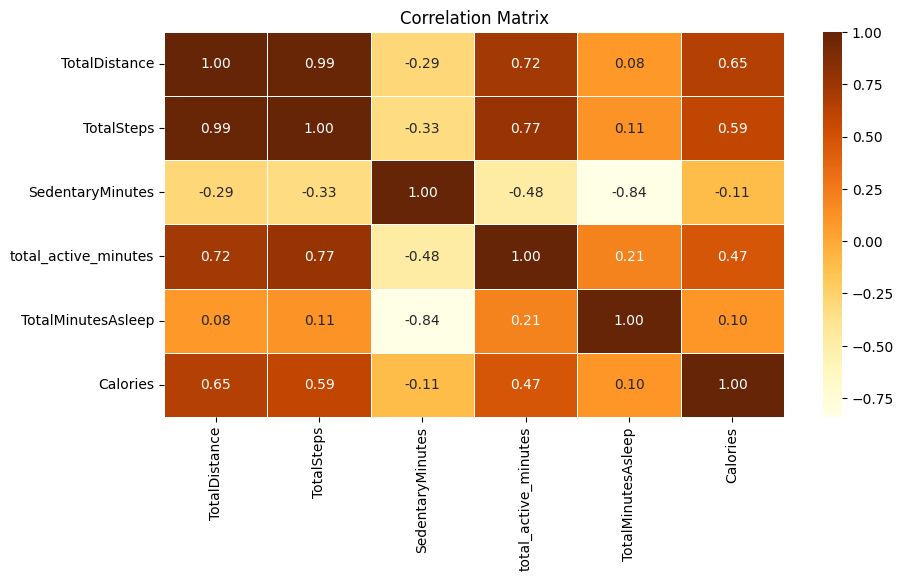

In [23]:
#Total active hours vs calories vs total steps vs total distance

fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.heatmap(daily_activity[["TotalDistance", "TotalSteps", 
         "SedentaryMinutes", "total_active_minutes","TotalMinutesAsleep", "Calories"]].corr(), 
            annot = True, 
            fmt = ".2f",
            linewidths=0.5,
          cmap = "YlOrBr")

ax.set_title('Correlation Matrix');

As seen from the above matrix:
1. There is a positive relation between calories and distance, steps and active minutes
2. However, clearly there is a negative relation between calories and sedentary_minutes and not so good between sedentary minutes and total minutes asleep.
3. The more distance you cover, the more calories you burn

**2. Calories vs Minutes Asleep, Sedentary Minutes and Active Minutes**

Text(0.5, 1.0, 'Total Active Minutes vs calories')

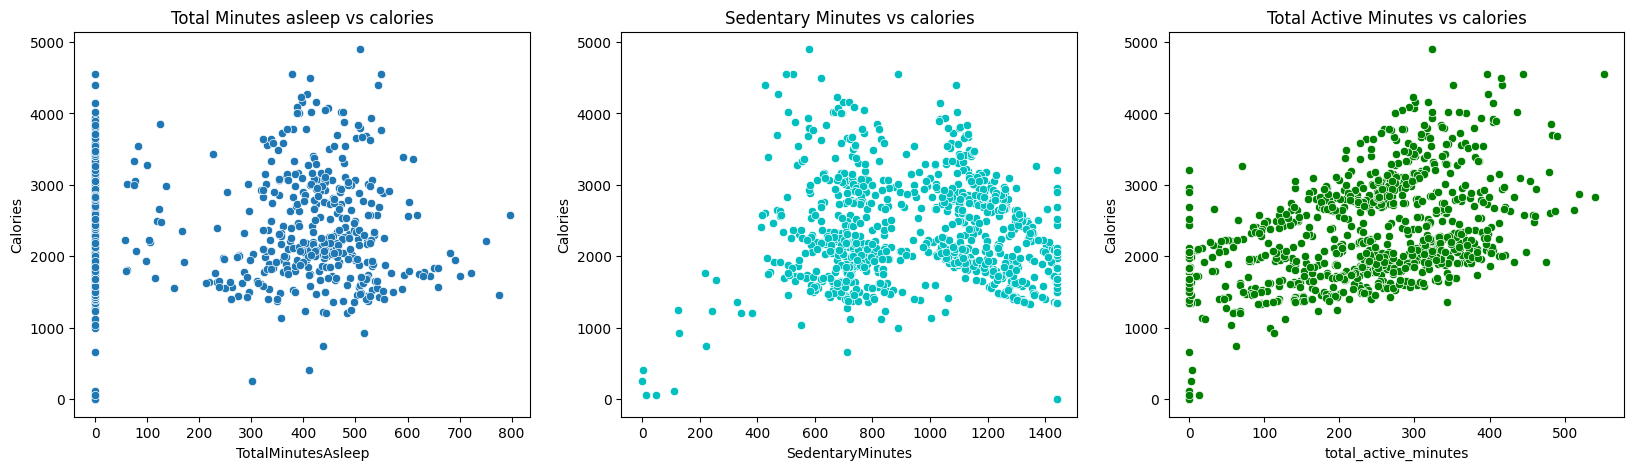

In [24]:
#We can see from our data, that there is huge difference in total active minutes vs total minutes.
#This gives us the idea that sedentary minutes time is longer than active minutes.

fig, axs = plt.subplots(ncols=3, figsize=(20, 5))
sns.scatterplot(data=daily_activity,x ='TotalMinutesAsleep', y = 'Calories', ax=axs[0]).set_title("Total Minutes asleep vs calories")
sns.scatterplot(data=daily_activity,x ='SedentaryMinutes', y = 'Calories', ax=axs[1], color='c').set_title("Sedentary Minutes vs calories")
sns.scatterplot(data=daily_activity,x ='total_active_minutes', y = 'Calories', ax=axs[2], color='g').set_title("Total Active Minutes vs calories")



From the above graphs, it can be seen that:

1. If a person sleeps for adequate number of hours, good amount of calories are burnt which is also proven scientifically (which depends also on their BMI)
2. The more the sedentary minutes, the less calories are burnt
3. A linear relation between, more active a person is, more are the calories burnt

**3. Active vs Sedentary Minutes**

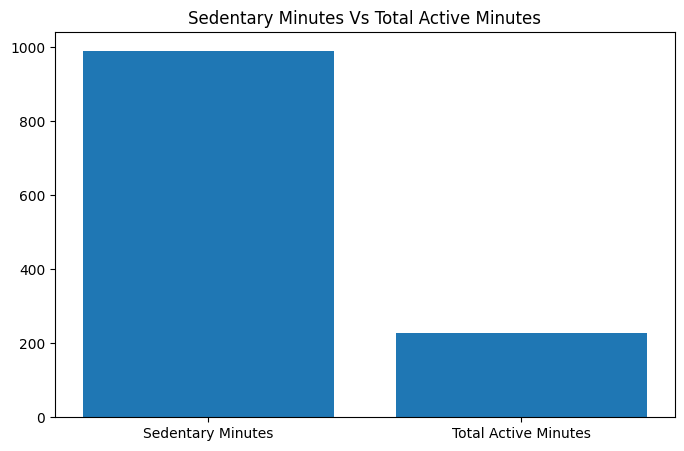

In [25]:
#We can see from df the huge difference between sedentary minutes and active minutes.
#The below figure would show how huge the difference is

fig, ax = plt.subplots(figsize=(8,5))
x = np.array(["Sedentary Minutes", "Total Active Minutes"])
y = np.array([daily_activity["SedentaryMinutes"].mean(),
              daily_activity["total_active_minutes"].mean()])

plt.title("Sedentary Minutes Vs Total Active Minutes")
plt.bar(x, y)
plt.show()  

It can be concluded that the time spent wearing the digital time and doing nothing is more.
This could mean that the digital item is used as an accessory or the person's lifestyle is more sedentary than active.

**4. Daily Steps vs Calories**

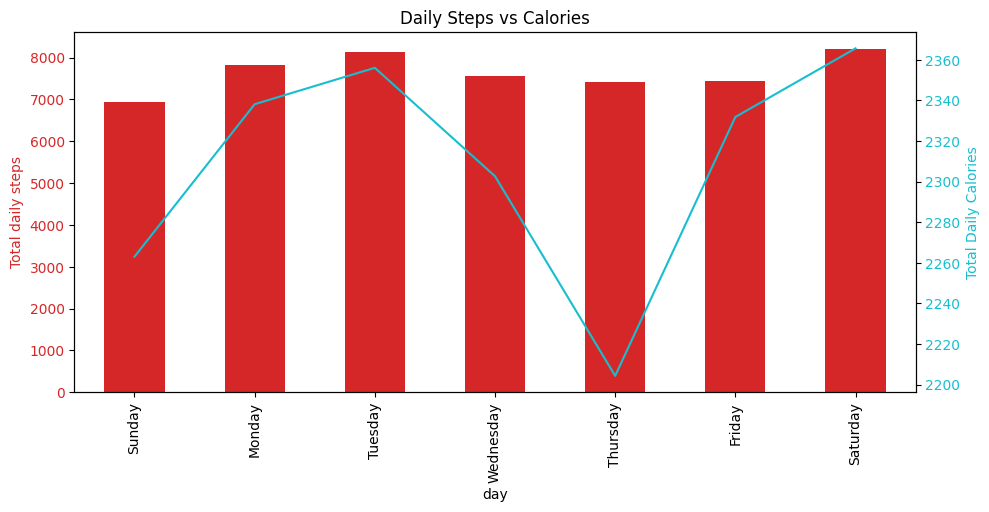

In [26]:
fig, ax1 = plt.subplots(figsize=(10,5))
color = 'tab:red'
ax1.set_xlabel('hour')
ax1.set_ylabel('Total daily steps', color=color)
#ax1.plot(x, y, color=color, linestyle='none', marker='o')
daily_activity.groupby(daily_activity['day'])["TotalSteps"].mean().plot(kind = "bar",color=color,ax = ax1)
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:cyan'
ax2.set_ylabel('Total Daily Calories', color=color)  # we already handled the x-label with ax1
#ax2.plot(daily_activity['day'], daily_activity["Calories"], color=color, linestyle='none', marker='o')
daily_activity.groupby(daily_activity['day'])["Calories"].mean().plot(color=color, ax = ax2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title("Daily Steps vs Calories")
plt.show()

* More calories are burnt on weekends: Friday and Saturday as more steps are taken
* Thursay is the least calories burnt day with decrease in the total steps taken
* least number of steps taken is on Monday yet the calories burnt are more than Thursday. The reason for this is the calories burnt are more a result of sleep plus sedantary minutes

**5. Relation between Hourly Steps and Calories Burnt**

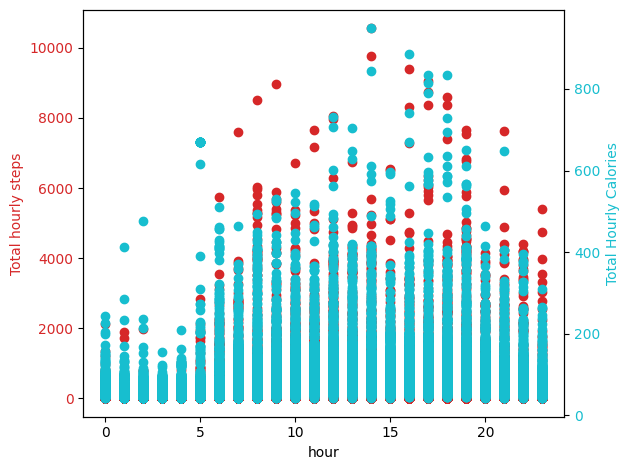

In [27]:
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('hour')
ax1.set_ylabel('Total hourly steps', color=color)
ax1.plot(hourly_steps_calories['hour'], hourly_steps_calories["total_hourly_steps"], color=color,
        linestyle='none', marker='o')
ax1.tick_params(axis='y', labelcolor=color)


ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:cyan'
ax2.set_ylabel('Total Hourly Calories', color=color)  # we already handled the x-label with ax1
ax2.plot(hourly_steps_calories['hour'], hourly_steps_calories["total_hourly_calories"], color=color,
        linestyle='none', marker='o')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

* More the number of steps, more calories are burnt.
* The graph depicts hourly record of steps vs calories.
* Between 8 to 19, the steps are more and hence the calories burnt are also more

**6. Most and Least Active Hours a day (Steps taken hourly)**

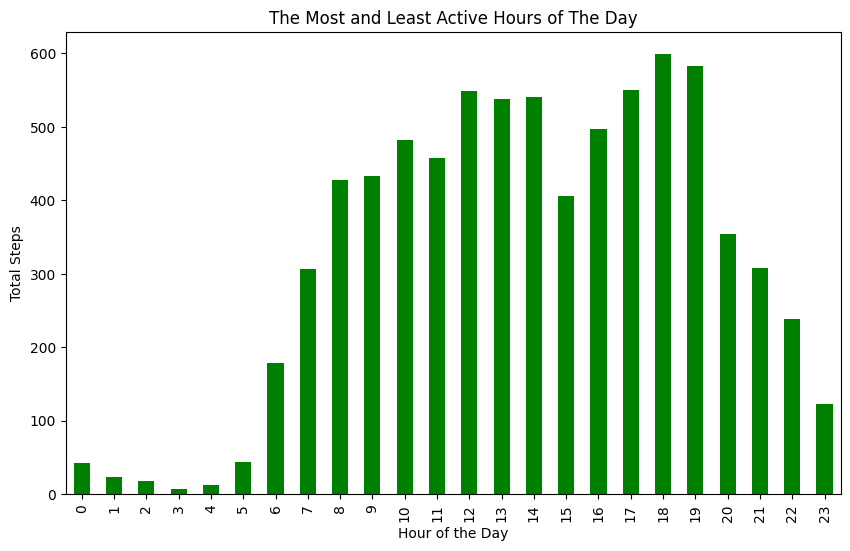

In [28]:
#Most and Least active time of the day

fig, axs = plt.subplots(figsize=(10, 6))
hourly_steps_calories.groupby(hourly_steps_calories['hour'])['total_hourly_steps'].mean().plot(kind='bar', ax=axs, color='g', title='The Most and Least Active Hours of The Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

Most number of steps are taken between 16:00 to 19:00 with the peak at 18:00
Between 23:00 to 5:00, least number of steps are taken
There is a spike in activity from 9:00 and remain active till 19:00

**7. Most and Least Calories Spent Hour a day**

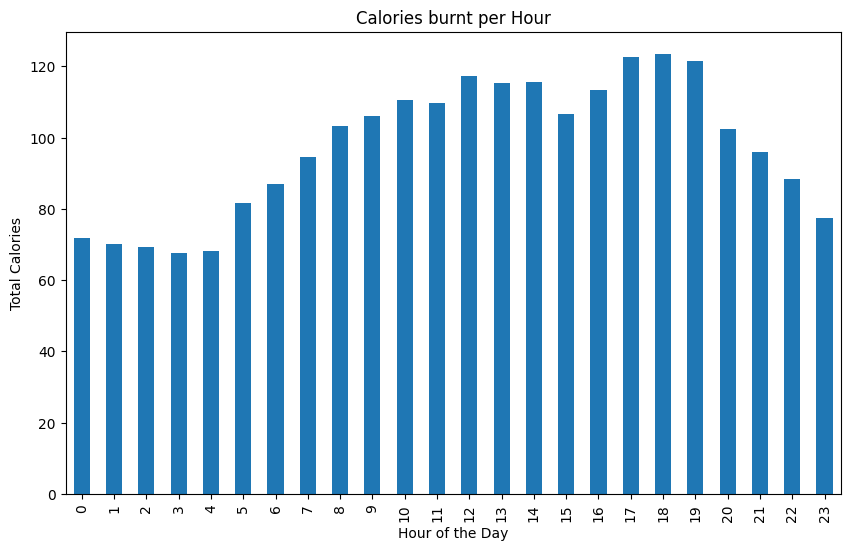

In [29]:
#Calories burnt in every hour

fig, axs = plt.subplots(figsize=(10, 6))
hourly_steps_calories.groupby(hourly_steps_calories['hour'])['total_hourly_calories'].mean().plot(kind='bar', ax=axs, title='Calories burnt per Hour')
plt.xlabel("Hour of the Day")
plt.ylabel("Total Calories")
plt.show()

Similar to the steps taken, the calories burnt are in sync with the hourly steps taken
From 8:00 to 19:00 there is an active calories burnt
From 23:00 to 5:00, the calories burnt are the least.
Between 17:00 to 19:00 the most amount of calories are burnt

# Step 4: Conclusion

* The product that consumers use is more of an accessory rather than an health product
* People are spending more time in doing no physical activity
* The most active time for people is in the evening between 5pm to 7pm
* Active time is directly related to the calories burnt
* More active days are Friday and Saturday, with Monday being the least active hour
* Sedantary Hours are much more than the total active hours in a day, this means people are not involved in much of the physical activity most of the day.
* Sleep hours also contribute to the calories burnt, if adequate number of hours are slept.

**Suggestions**

* People who are less active, personalized promotions could be offered to them to retain their membership.
* Usually people are active in the evening time, so a reminder could be set up to remind the users to complete some target steps each day
* Pertaining to the sleep cycle, a reminder could also be sent before 3hours of sleeping to stop any physical activity in order to have a good sleep.
* Users who are active and achieve their target could be provided with some offers to further engage them in more activity
* It is good reminder to users that despite not taking a walking, even light activity pertains to physical activity and can be used to detect the calories burnt. This means it is advisable to wear the digital product more hours a day to get more accurate results.
* It could be worn as an accessory to enhance the looks as well. 